# UPC Quantum Engineering Final Project: Quantum Channel Discrimination

Tutor: Matteo Rosati
Students: Jesús Huerta & Albert Solana

Date: February 2021

## Introduction

Our goal consists of being able to discrimate between two-qubit amplitude damping channels.

Given an amplitude damping channel, which can be described similarly as the way a system dissipates energy, it can be characterized by an attenuation factor, we will call it $\eta$ and it can be seen as how probable it to lose energy (state decay, loss of a photon,...). As we want discriminate between two quantum channels, we will have one factor for each one, $\eta_0$, $\eta_1$). We will look for the optimal input state (defined by angle $\theta_{in}$ and phase $\phi_{in}$) and output measurement basis (described by $\phi_{out}$ and $\theta_{out}$), so that better identifies the channel and which $\eta$ from the two provided is the one used.

Our project is based on the [Discriminating qubit amplitude damping channels paper](https://arxiv.org/abs/2009.01000) So, we will be checking the results we obtain to be aligned with the ones from the paper.

For this project we implement several quantum circuits, going from the most simple to more sophisticated ones that perfect the task to solve: the discrimination of the given amplitude damping channel.

As described in \[1\], an amplitude damping channel is described by the Kraus operators:
$$
E_0 =
\begin{bmatrix}
1 & 0\\
0 & \sqrt{1 - \lambda}
\end{bmatrix}
$$
$$
E_1 =
\begin{bmatrix}
0 & \sqrt{\lambda}\\
0 & 0
\end{bmatrix}
$$

here $\lambda$ relates to $\eta$ as $\lambda = sin^2 (\eta)$.

A circuit model for amplitude damping can be shown as:

![amplitude damping channel](damping-channel.png "Amplitude Damping Channel")

being $U_{\eta}$ as simple as the following gates (in this picture $\theta$ is equal to $\eta$):

![](un-gates.png)

When we launch an execution, we define the following 6 variables to solve our optimization problem that best discriminate the channel:
- Input state: angle $\theta_{in}$ and phase $\phi_{in}$, as $\Psi_{in}$ = cos $\theta_{in}$ |0$\rangle\ + e^{i\phi_{in}} sin  \theta_{in} |1\rangle\$

- Channel attenuation factors: $\eta_0$ and $\eta_1$, which describe the channels an parametrize the CY gate in the circuit.

- Output measurement: $\phi_{out}$ and $\theta_{out}$, defining our measurement basis and describing the rotations last gates $R_{z}$ and $R_{y}$ perform. 

An example circuit:

![](base-circuit.png)

Finally, for every strategy we want to test, we proceed with the following steps:

1. **Initial State Preparation**:
As we have to provide the state values to initialize the input qubit $\psi$ we have to do a conversion from angles in the sphere to statevector amplitudes. These state vectors will be pure states, expressed as the combination of $\alpha|0\rangle\,+\,\beta|1\rangle$, where $\alpha^2 + \beta^2$ = 1. As default values, we generate 200 state vectors as a combination of 20 $\theta_{in}$ angles and 10 $\phi_{in}$ phases evenly distributed to fulfill the $2\pi$ rotations.

2. **Run the circuit and do the measurement**:
For every input qubit state, we set the circuit applying the passed $\eta$ as attenuation degree and $\phi_{out}$ and $\theta_{out}$ as the measurement rotations.

3. **Results Analysis**:
For each strategy, we show the following analysis:
- Impact of the amplitude damping channel attenuation comparing the input and output probabilites
- Effect of the amplitude damping channel attenuation on the Bloch sphere
- Computing the amplitude damping channel fidelity

Since all previous results are performed on an ideal noiseless quantum simulator, we also provide som **extended results**:
- Effect of the amplitude damping channel attenuation on the Bloch sphere on a real IBMQ Quantum device (only for a few points)
- Effect of the amplitude damping channel attenuation on the Bloch sphere adding a noise model to the quantum simulation


## One-shot Discrimination



In [34]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

import numpy as np
from numpy import pi
import math
from src.quantum_channel_discrimination_2 import plot_probabilities2, run_base_circuit, plot_surface_probabilities, plot_wireframe_blochs, plot_surface_blochs, plot_fidelity

In [20]:
points_theta = 20  # Points of Theta angle (pi) in Bloch sphere - min 2
points_phase = 10  # Points of Phase angle (2*pi) in Bloch sphere - min 2
# angles shift from first parameter, to the second one, with jumps using the third parameter
# angles_eta = [0, pi/1.5]
out_rx_angle=0
out_ry_angle=0
angles_eta = np.arange(0, np.pi/2, np.pi/(points_theta*points_phase))
initialStates, totalResults, totalCounts, totalCircuits, totalFinalStates, anglesPhase, Z_Output0, Z_Output1, X_Input0, X_Input1, Y_Eta, initialStatesReshaped, allChannelsFinalStatesReshaped, eta_degrees = run_base_circuit(angles_eta=angles_eta, points_theta=points_theta, points_phase=points_phase, iterations=2000, out_rx_angle=out_rx_angle, out_ry_angle=out_ry_angle)

Simulating channel with λ = 0.00
Simulating channel with λ = 0.02
Simulating channel with λ = 0.10
Simulating channel with λ = 0.21
Simulating channel with λ = 0.35
Simulating channel with λ = 0.50
Simulating channel with λ = 0.65
Simulating channel with λ = 0.79
Simulating channel with λ = 0.90
Simulating channel with λ = 0.98


### Initial base circuit with Input $\psi = \alpha|0\rangle\, +\, \beta|1\rangle$ with $\eta=0$, $\phi_{out}=0$ and $\theta_{out}=0$

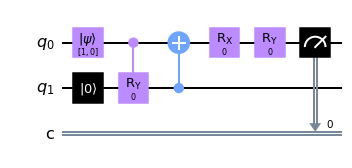

In [21]:
totalCircuits[0][0].draw('mpl')

### Impact of the amplitude damping channel attenuation comparing the input and output probabilites
#### For all 200 Input States, from $\eta=0$ to $\eta=\pi$ and output measurement to $\phi_{out}=0$ and $\theta_{out}=0$

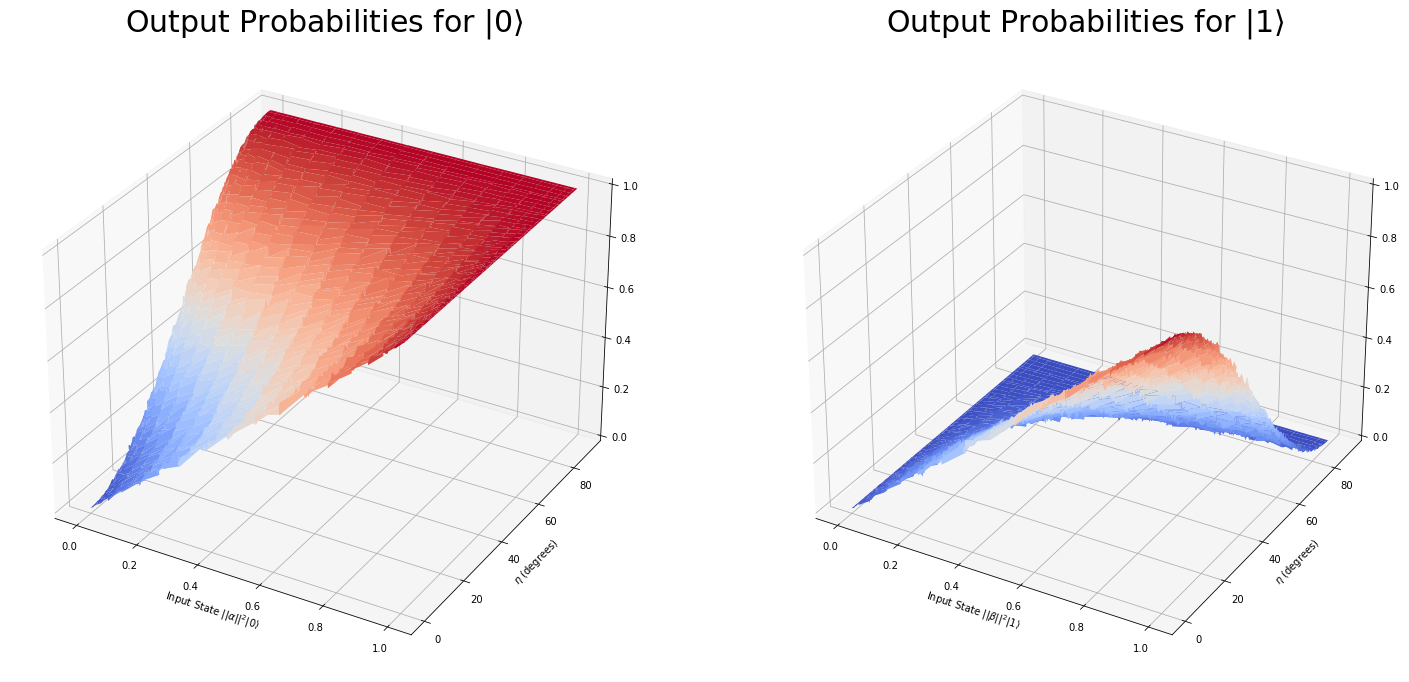

In [22]:
plot_surface_probabilities(X_Input0, X_Input1, Z_Output0, Z_Output1, eta_degrees)

![Input vs Output Probabilities](../src/img/output_probs2.png "Input vs Output Probabilities")

These 2 pictures show the probabilities of obtaining as a result of the measurement (in computational basis) a |0> or a |1> and show the square of input amplitude (probability) for |0> and |1> respectively, and the $\eta$ for each circuit simulated.

As expected, when $\eta$=0, (we don't introduce any attenuation), we should see the same probability for the output as the input state. That's why we can see something similar to x = z for $\eta$=0, as our x for each graph represents the probability of |0> and |1> respectively.

On the opposite side, when we have $\eta$=$\pi$, we get always a probability equal to 1 to measure the state |0>, and therefore 0 probabilities of measuring a |1>.  

### Effect of the amplitude damping channel attenuation on the Bloch sphere
#### For all 200 Input States, from 8 channels $\eta=0$ to $\eta=\pi$ and output measurement to $\phi_{out}=0$ and $\theta_{out}=0$

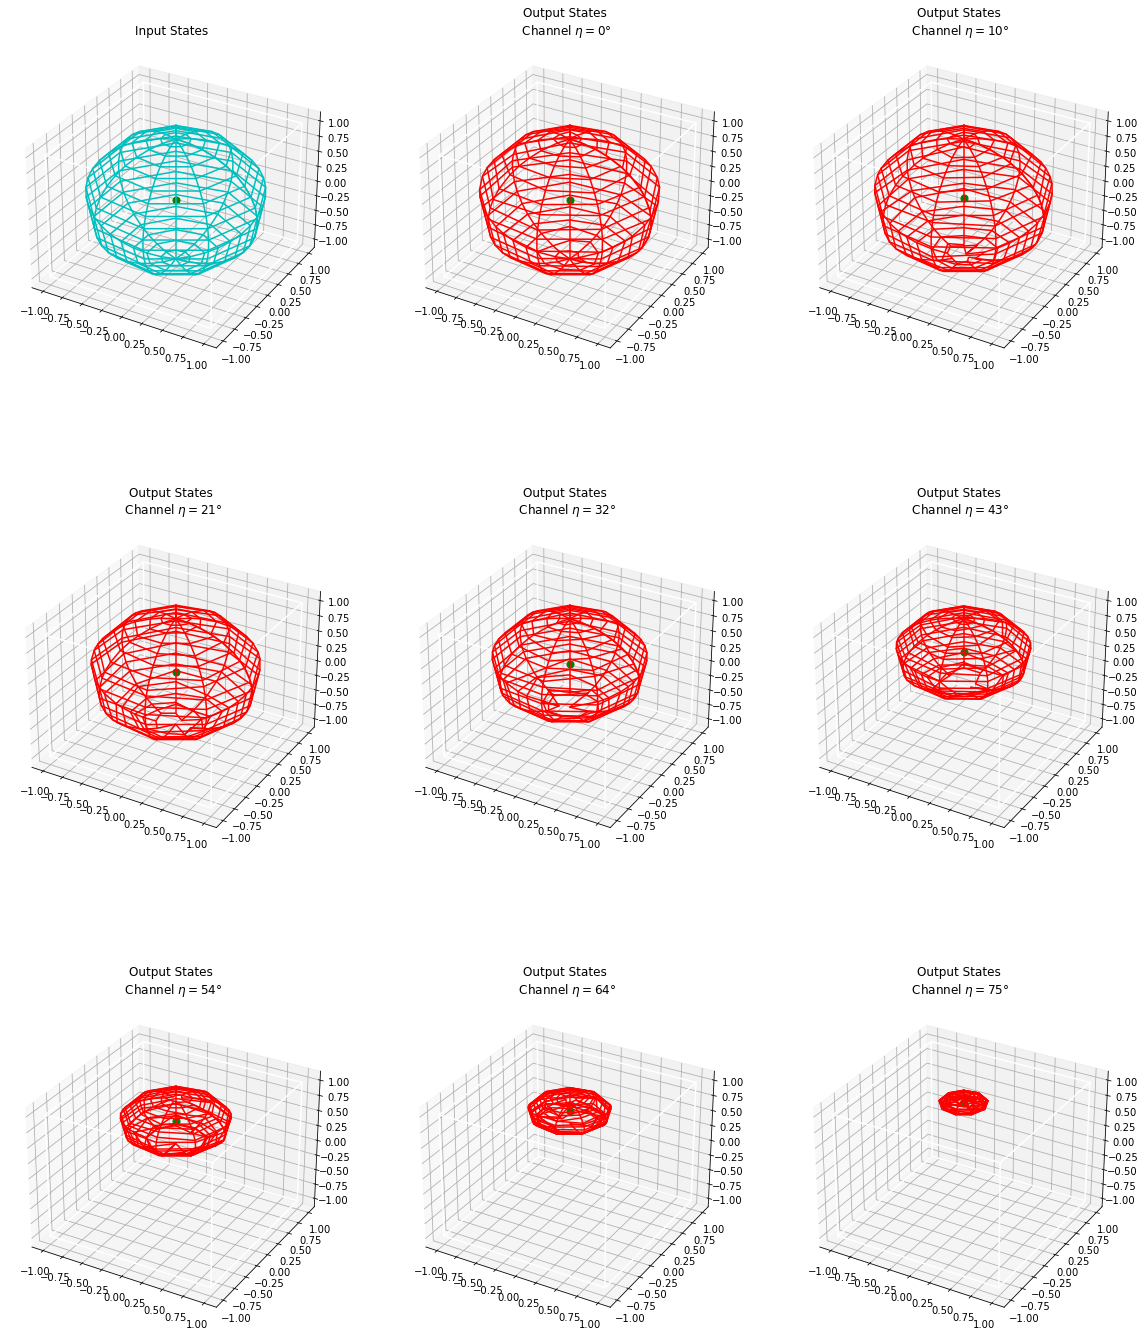

In [23]:
plot_wireframe_blochs(initialStatesReshaped, allChannelsFinalStatesReshaped, angles_eta, rows=3, cols=3)

What we see here is how the initial Bloch sphere, which represents the set of our pure initial states arrives to the end of the circuit compressed against the |0> state. This deflation depends on the attenuation factor, being 0 the equivalent to a 'lossless system' and $\pi$ a 'full loss' as no information is preserved at the end. 

Some additional things we see here is the preservation of the |0>, which translates to a preservation of all $\alpha$ amplitudes, while the atte

### Effect of the amplitude damping channel attenuation on the Bloch sphere
#### For all 200 Input States, from 8 channels $\eta=0$ to $\eta=\pi$ and output measurement to $\phi_{out}=0$ and $\theta_{out}=0$

In [24]:
plot_surface_blochs(initialStatesReshaped, allChannelsFinalStatesReshaped, angles_eta, rows=3, cols=3)

ValueError: need at least one array to concatenate

<Figure size 1440x1800 with 18 Axes>

### Computing the amplitude damping channel fidelity to Input State $|0\rangle$
#### For all 200 Input States, from 10 channels $\eta=0$ to $\eta=\pi/2$ and output measurement to $\phi_{out}=0$ and $\theta_{out}=0$

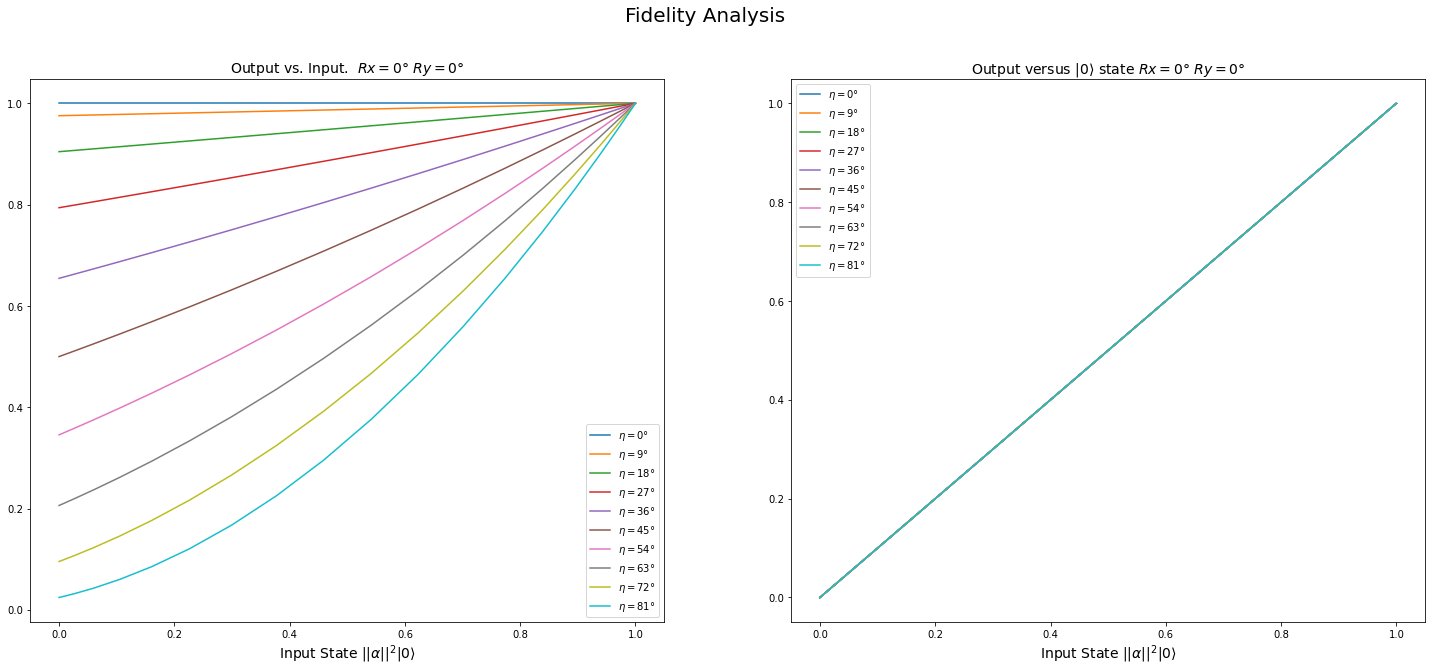

In [25]:
plot_fidelity(angles_eta, pointsTheta=points_theta)

### Computing the amplitude damping channel fidelity to Input State $|0\rangle$
#### For all 200 Input States, from 10 channels $\eta=0$ to $\eta=2\pi$ and output measurement changing from $0$ to $2\pi$ for both $\phi_{out}$ and $\theta_{out}$

### !!!TBD: the following plots will be updated to show a better result.

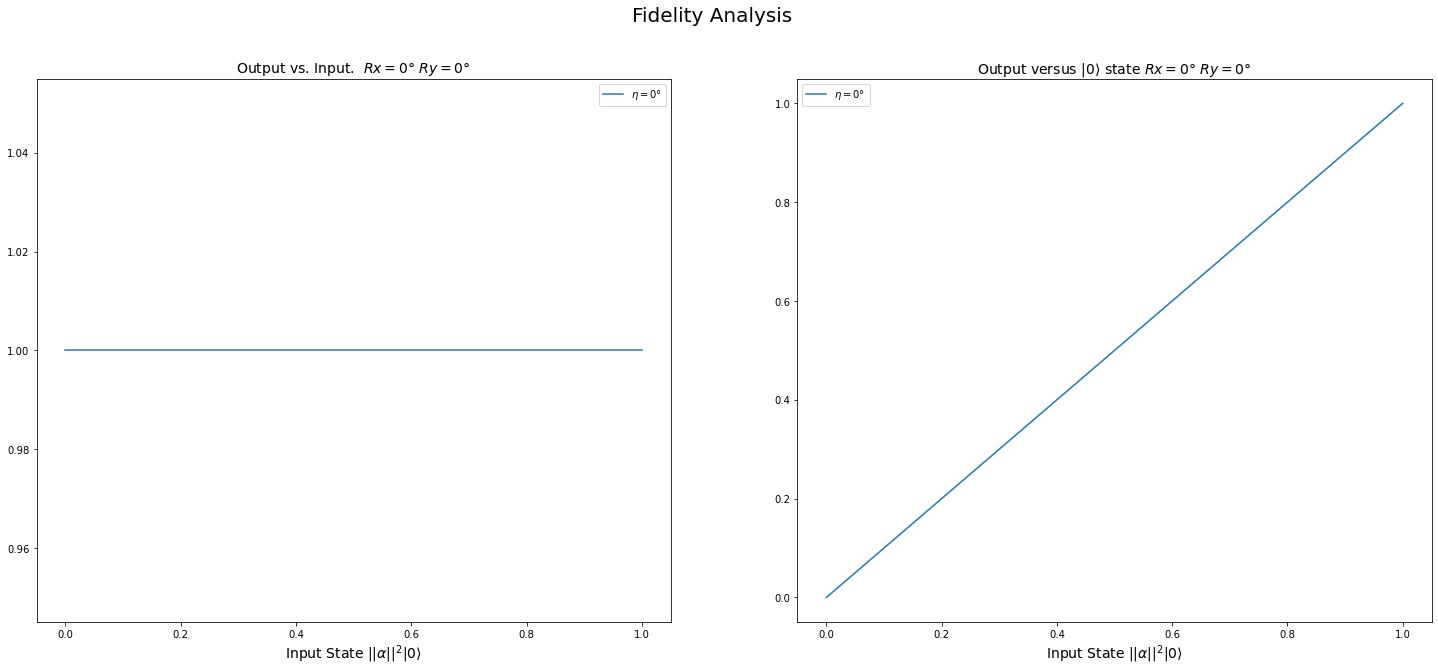

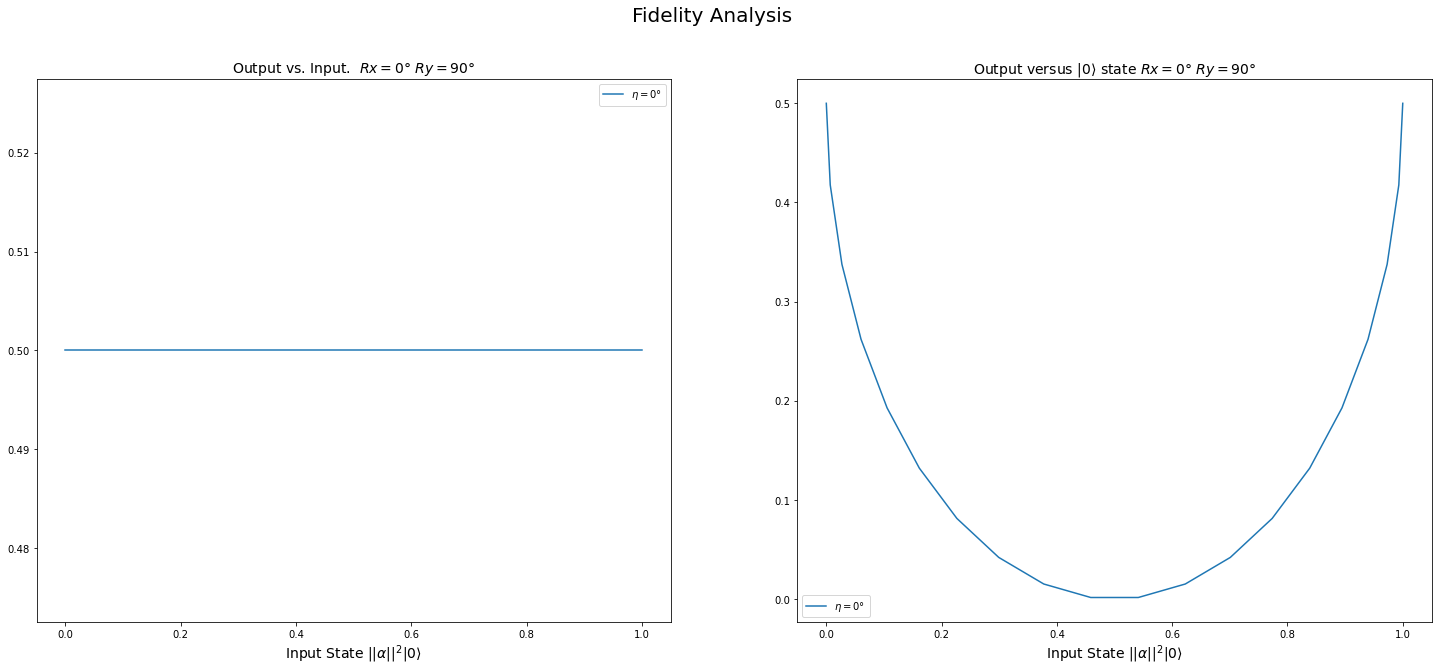

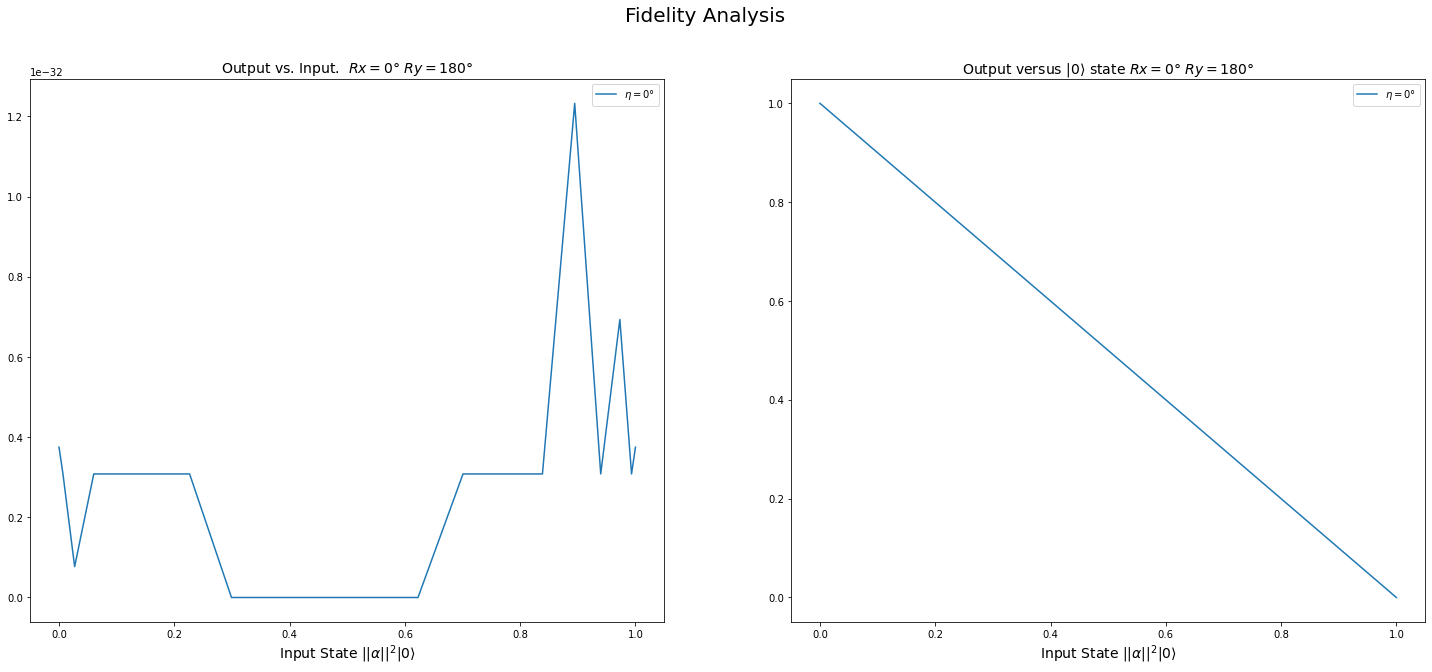

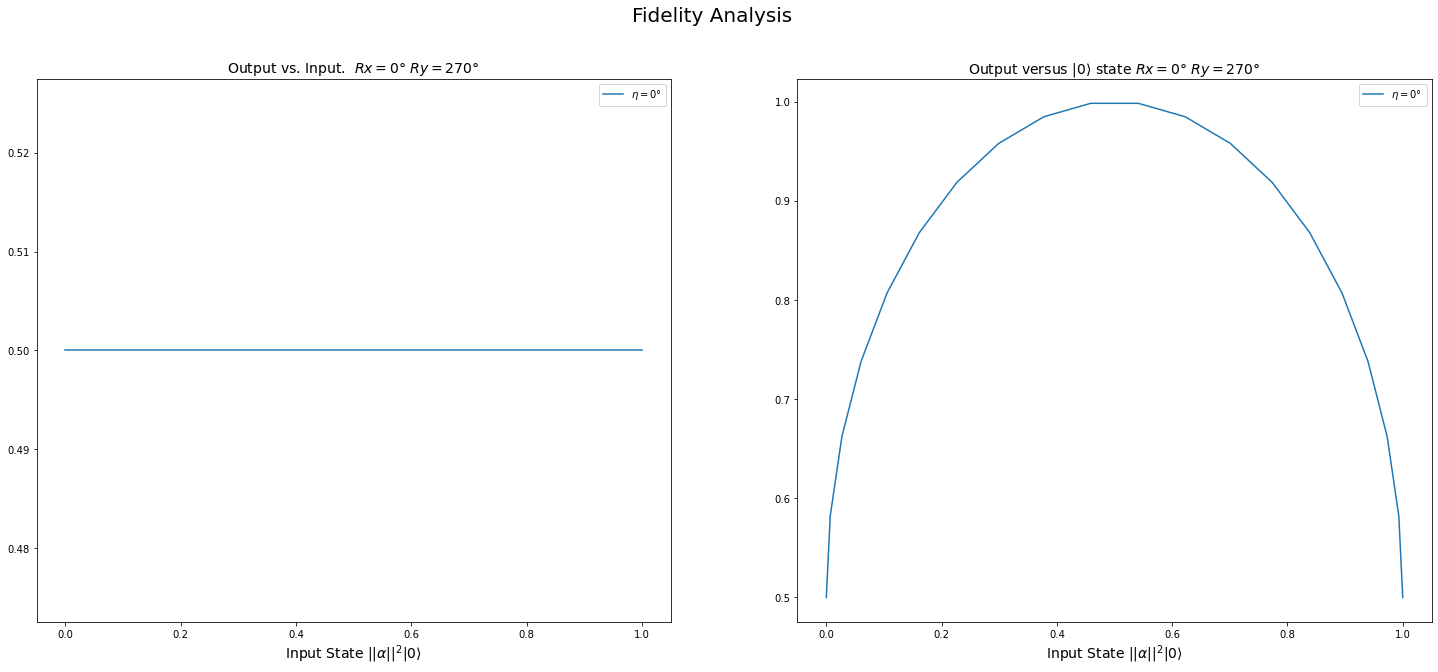

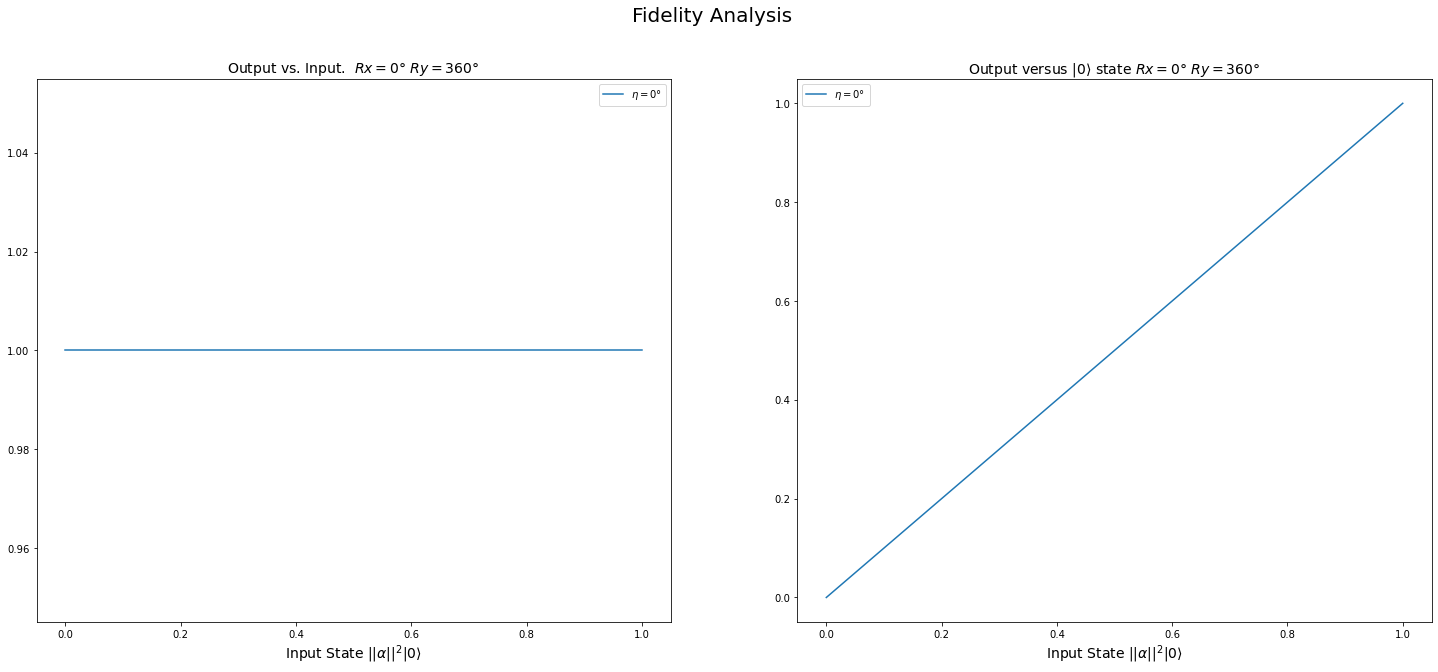

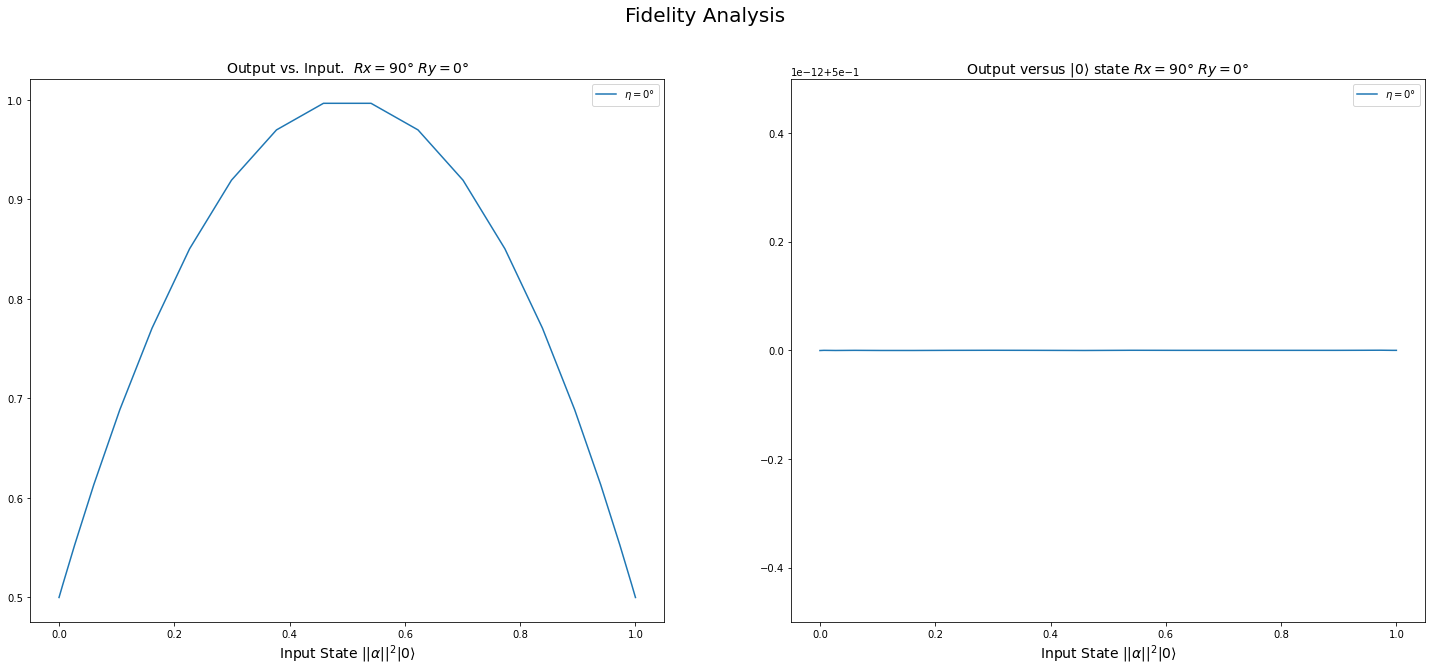

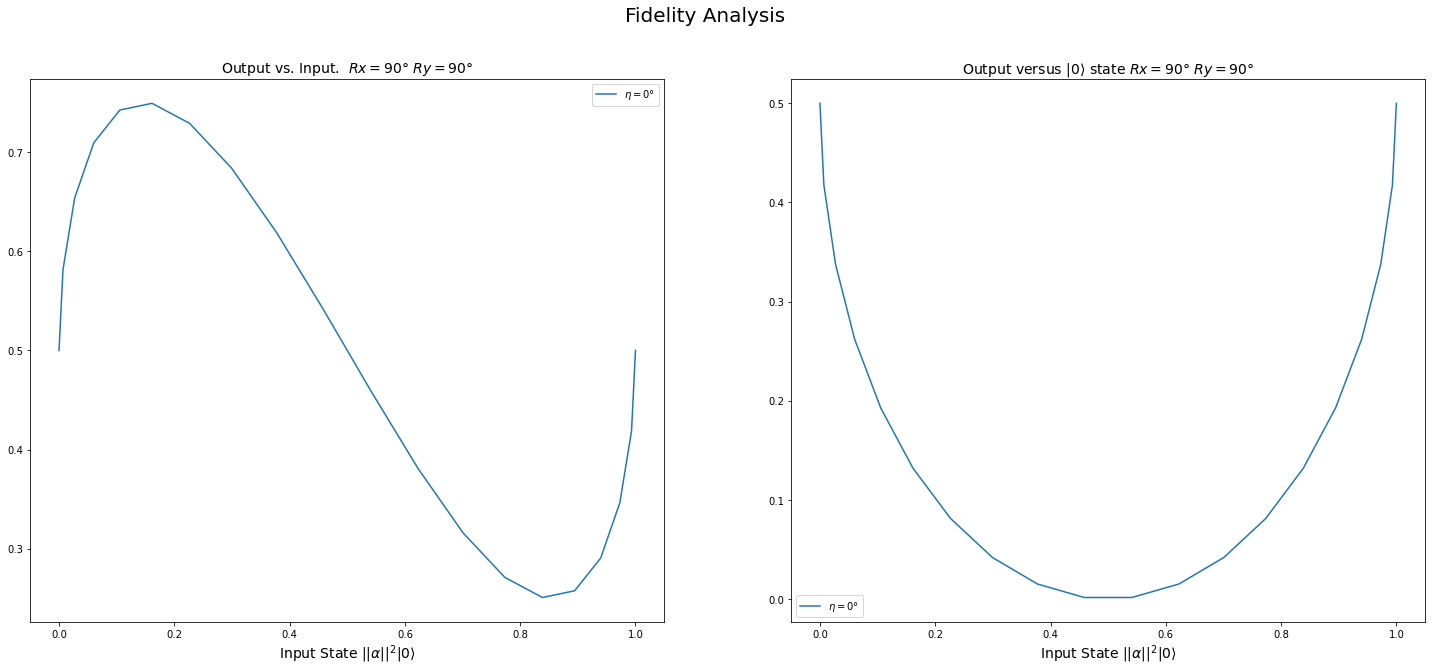

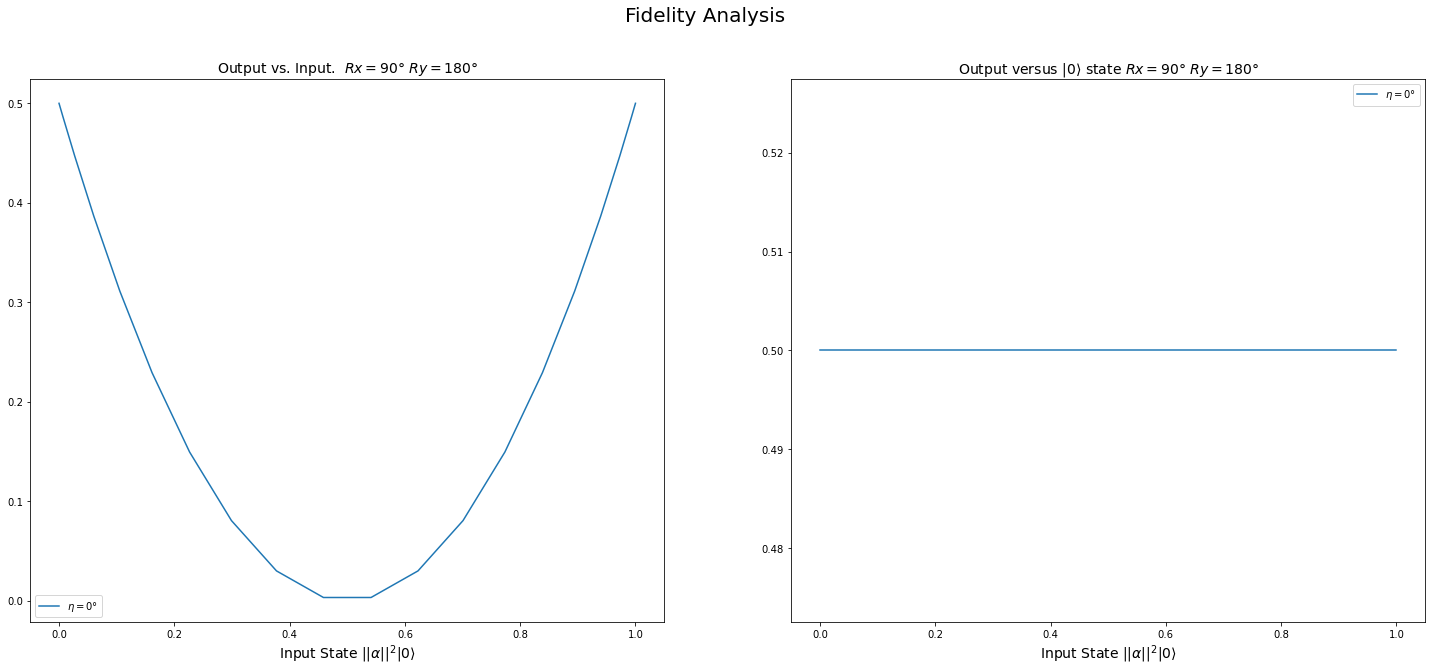

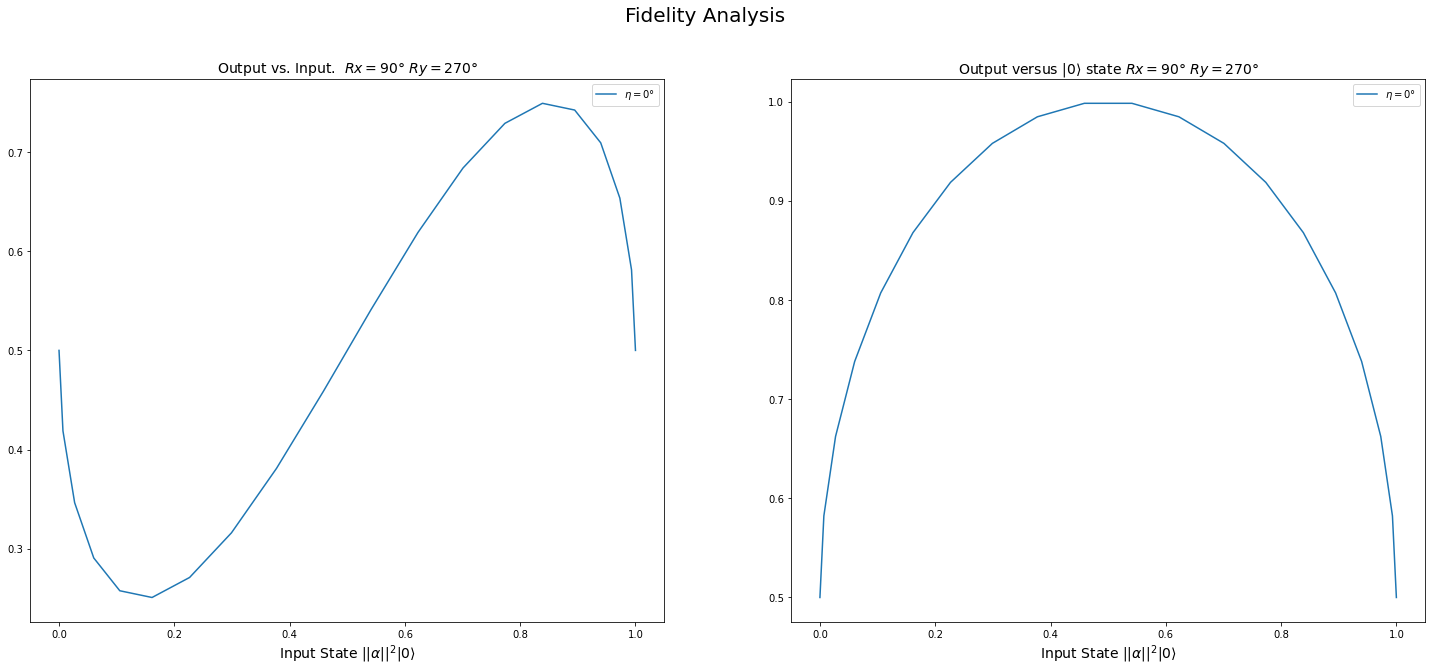

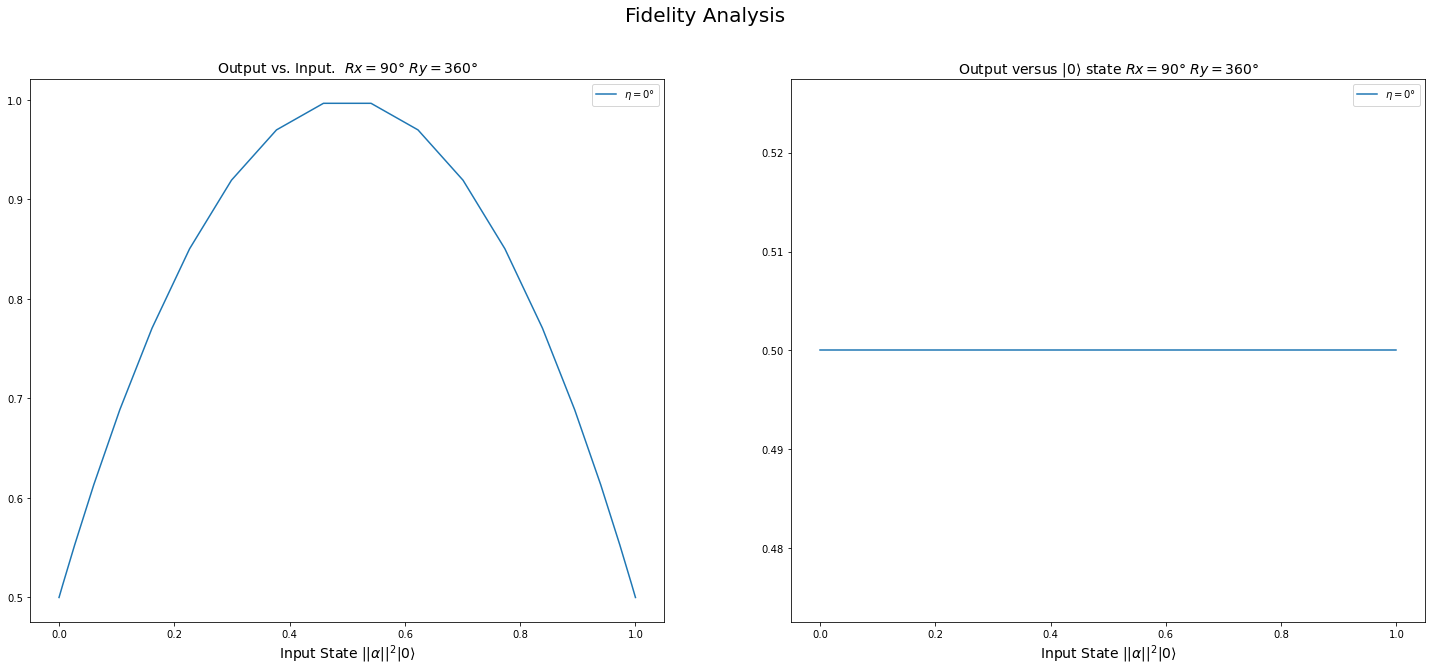

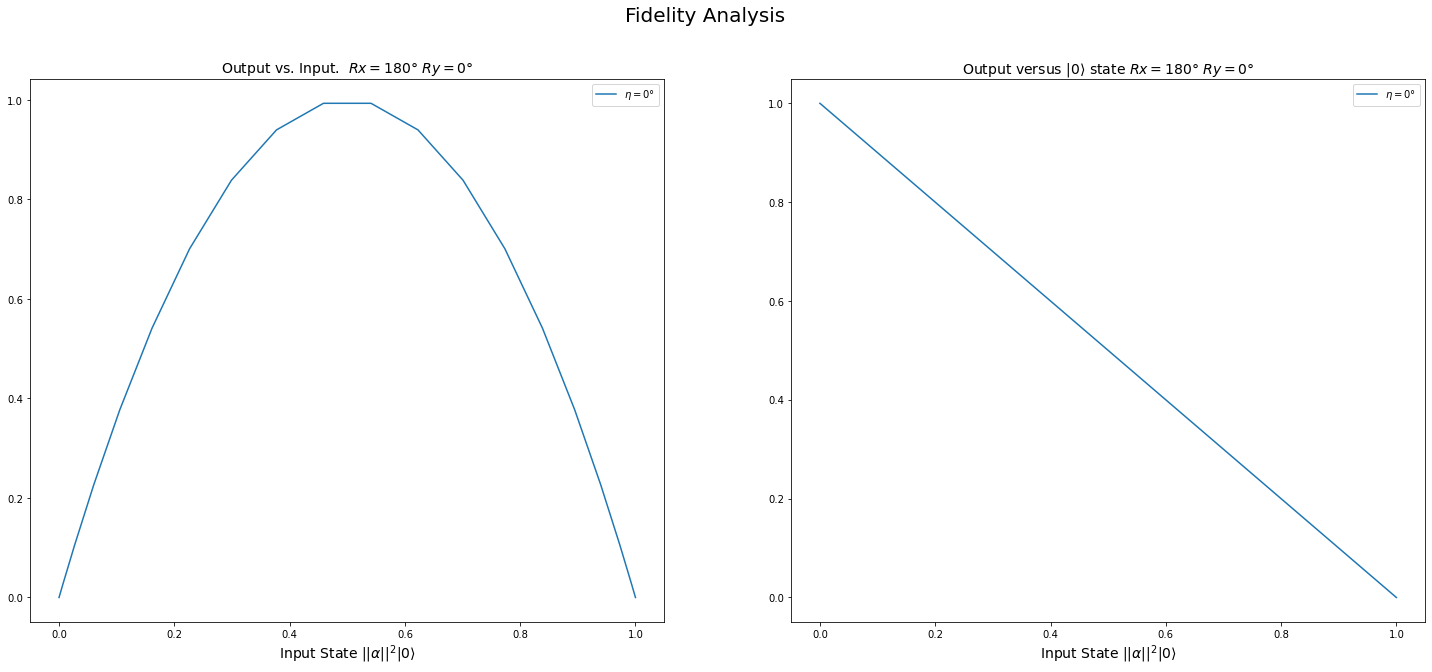

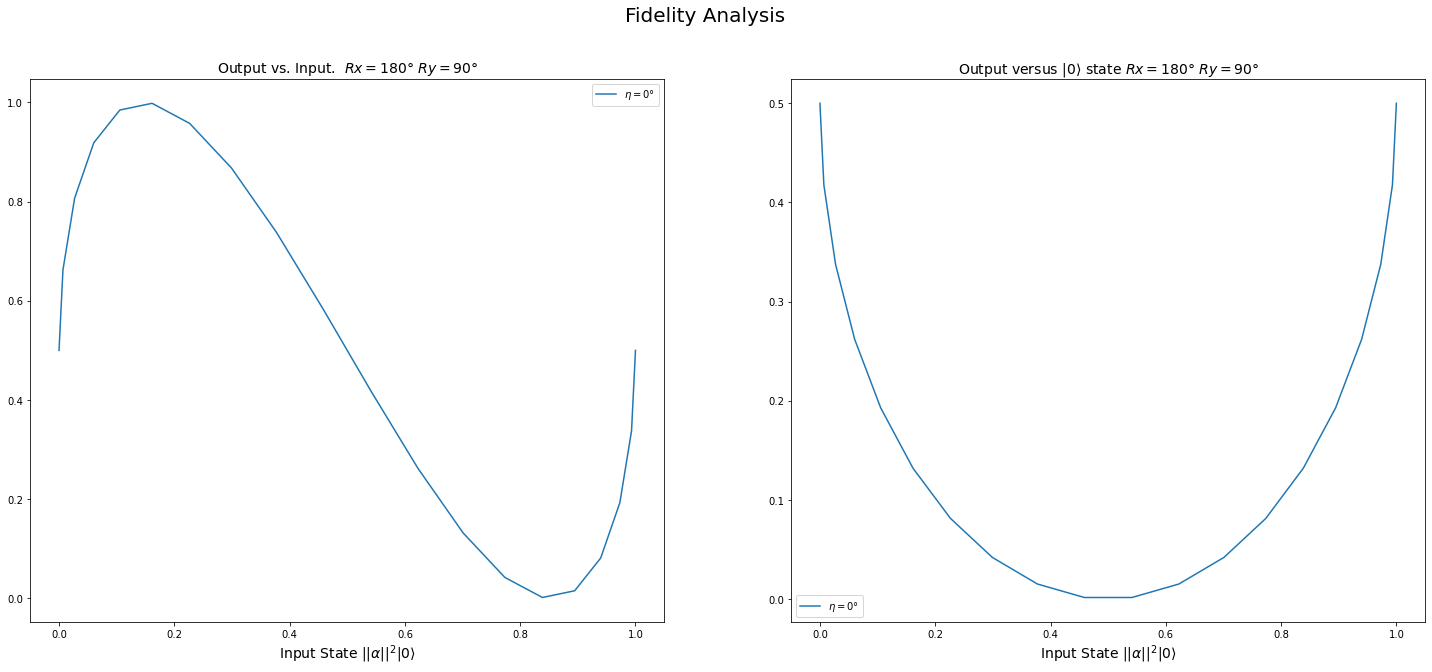

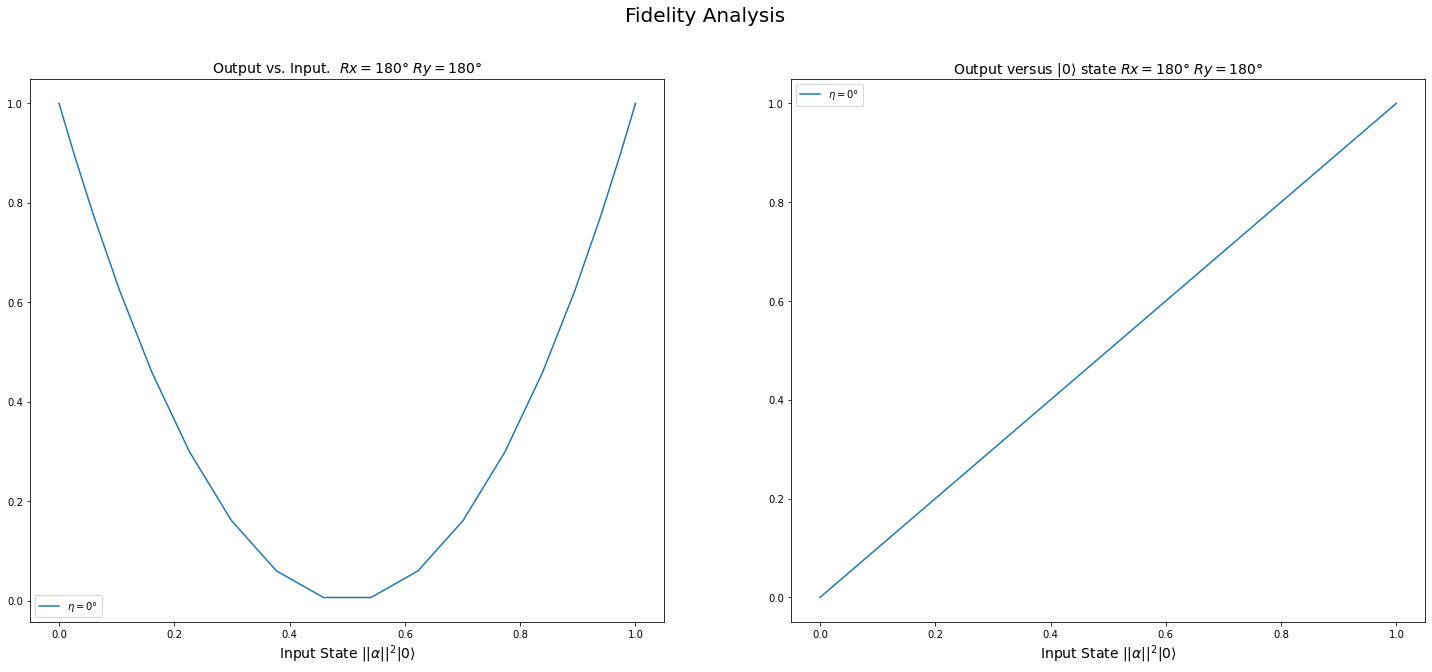

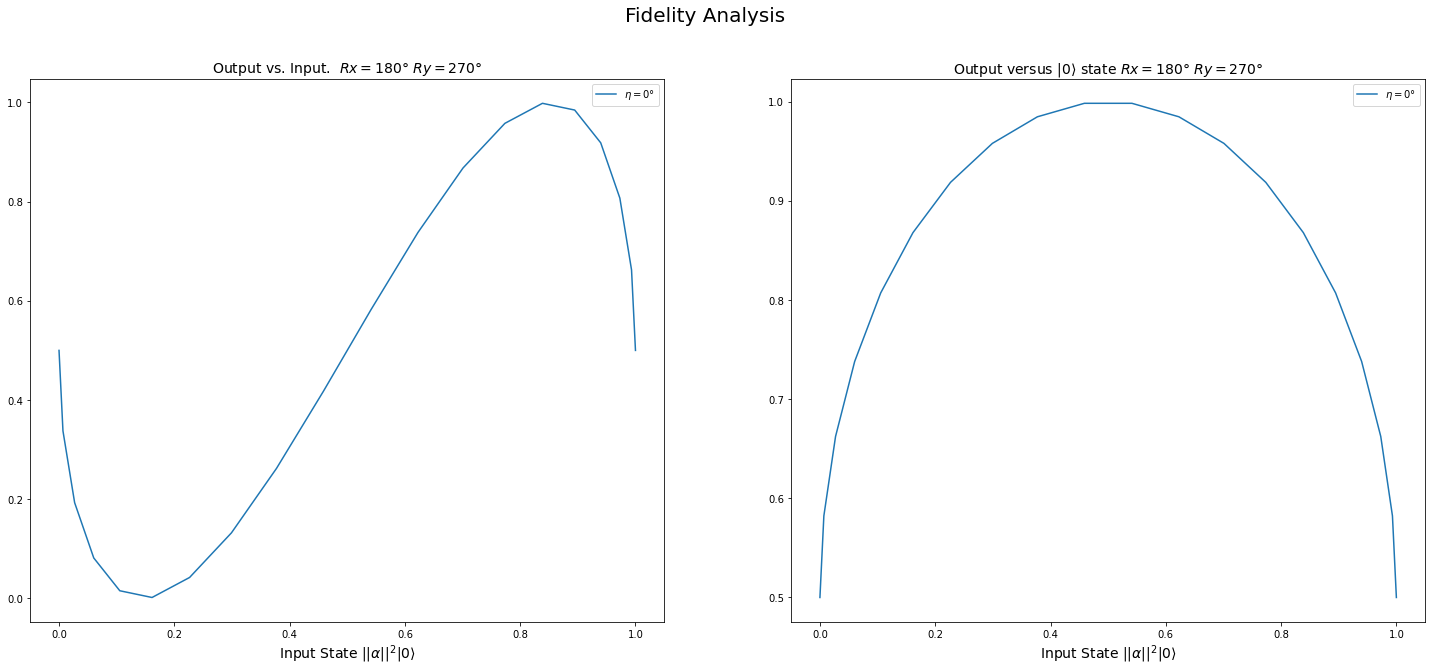

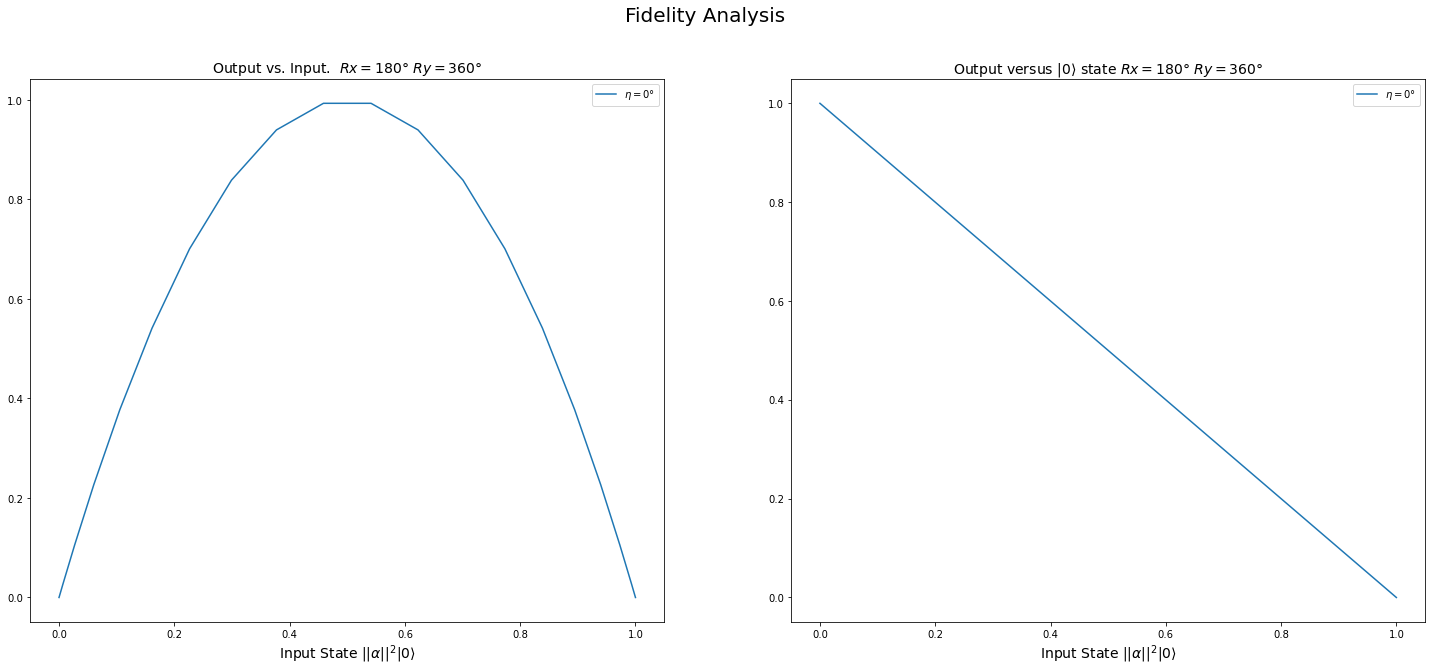

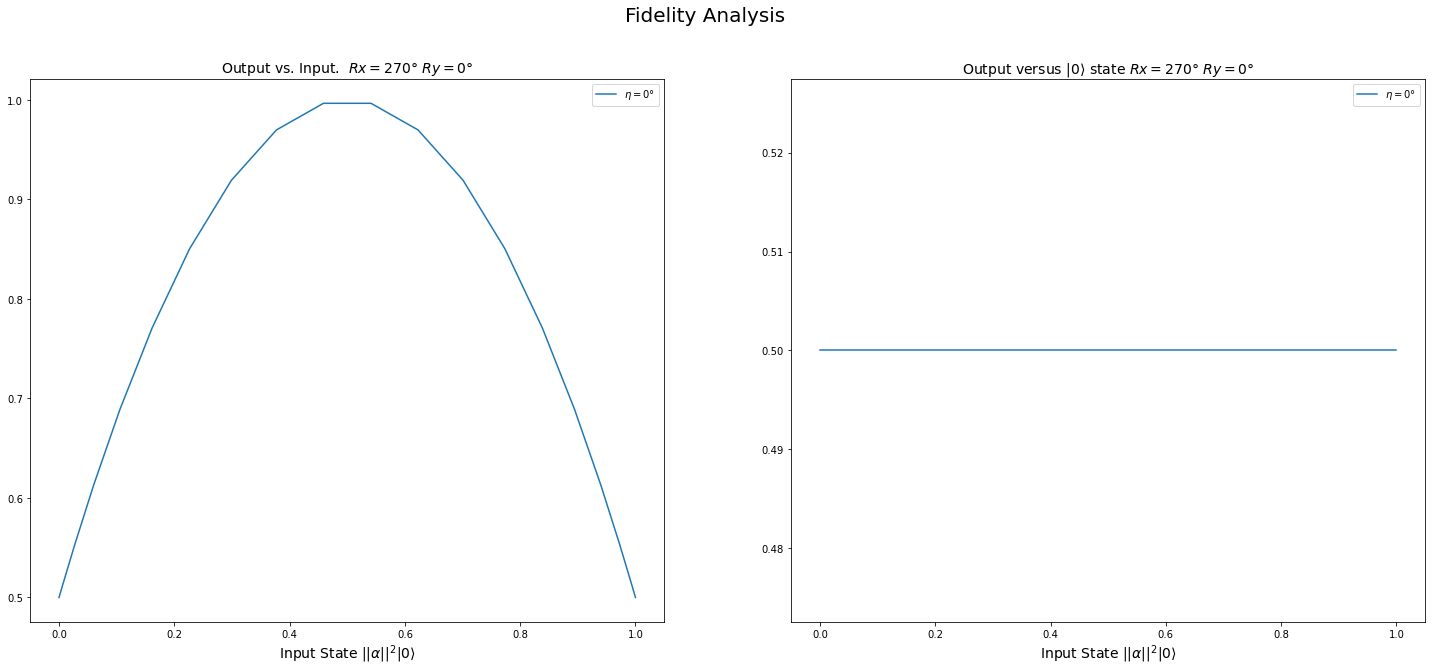

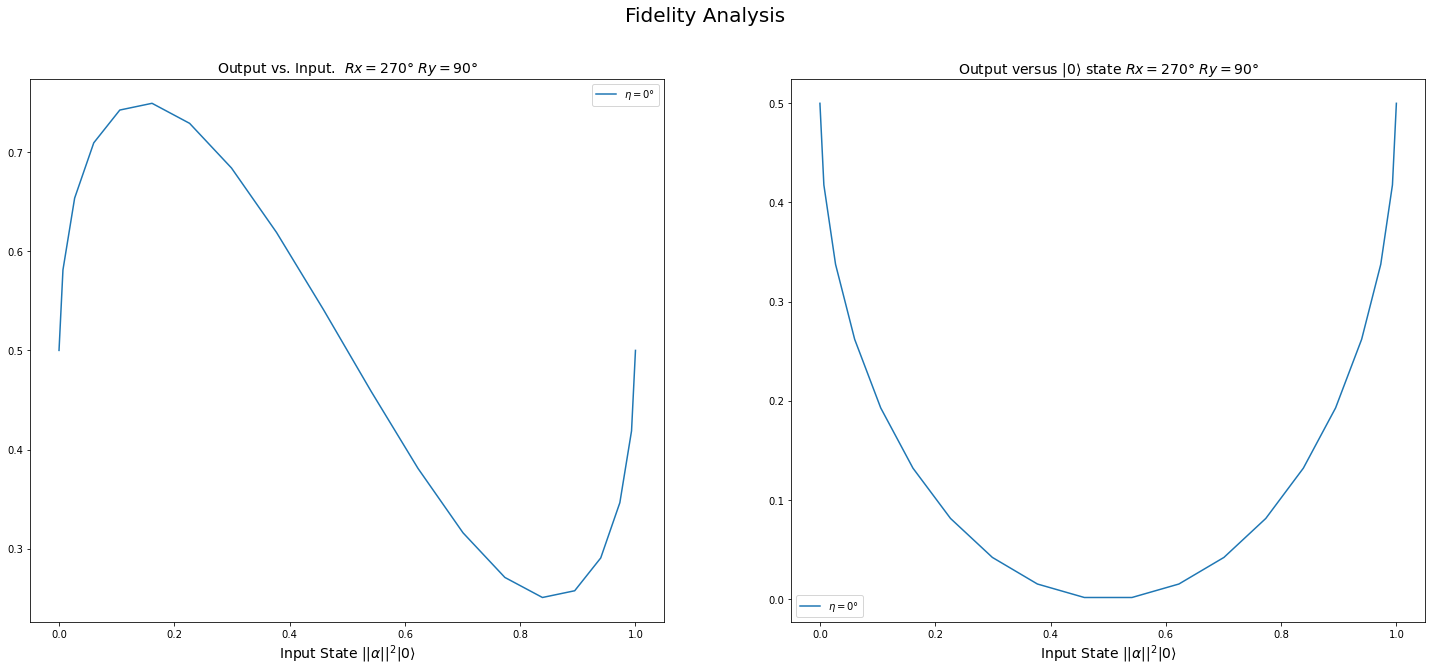

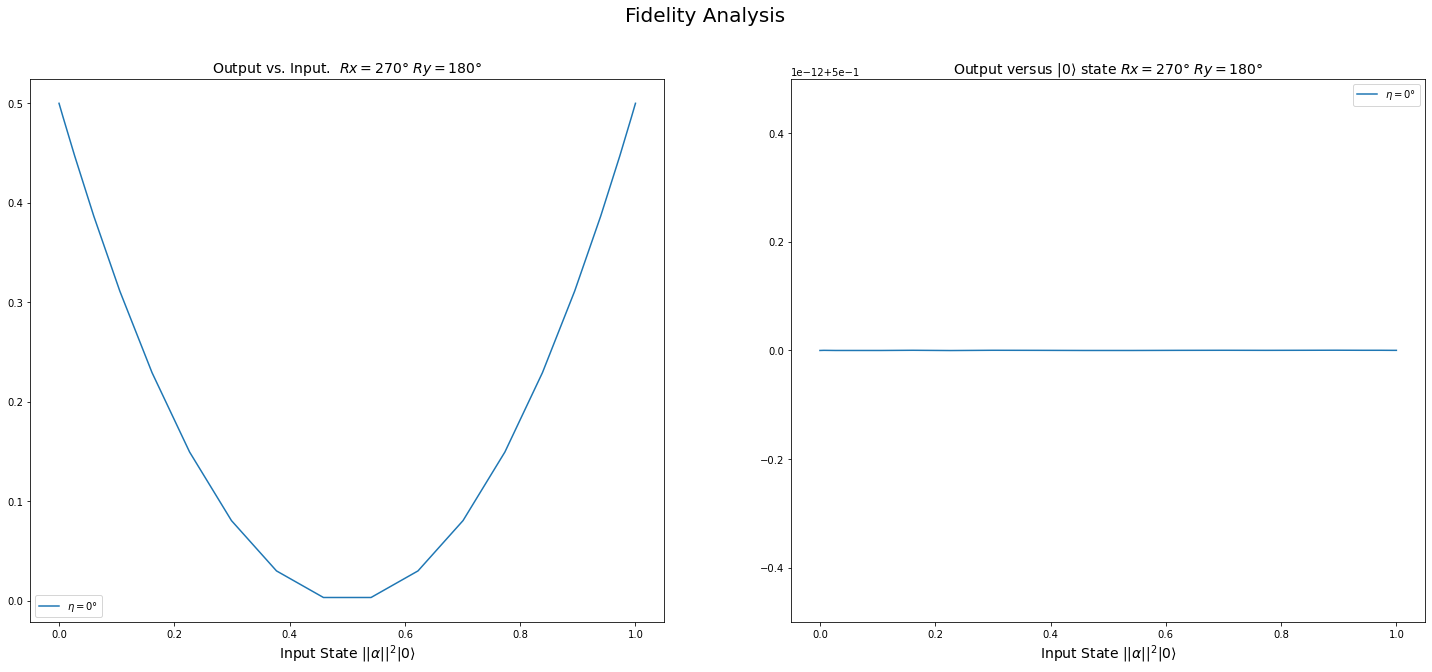

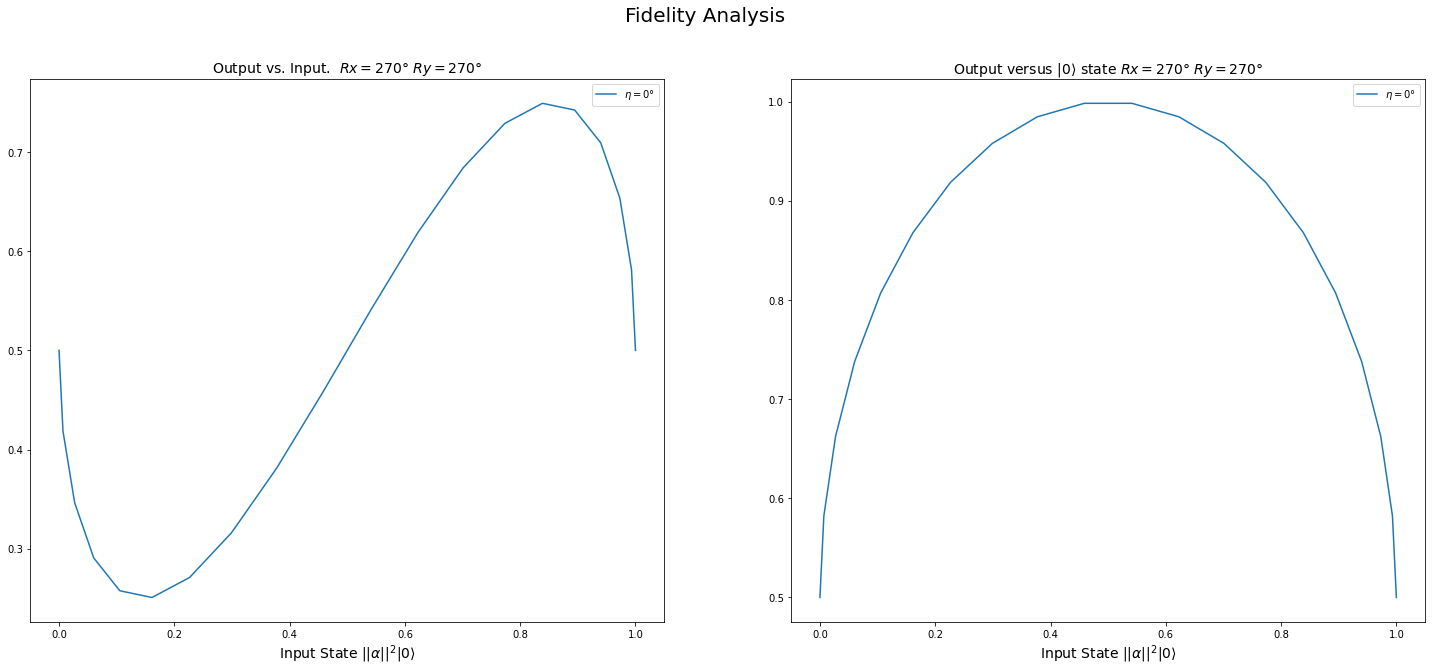

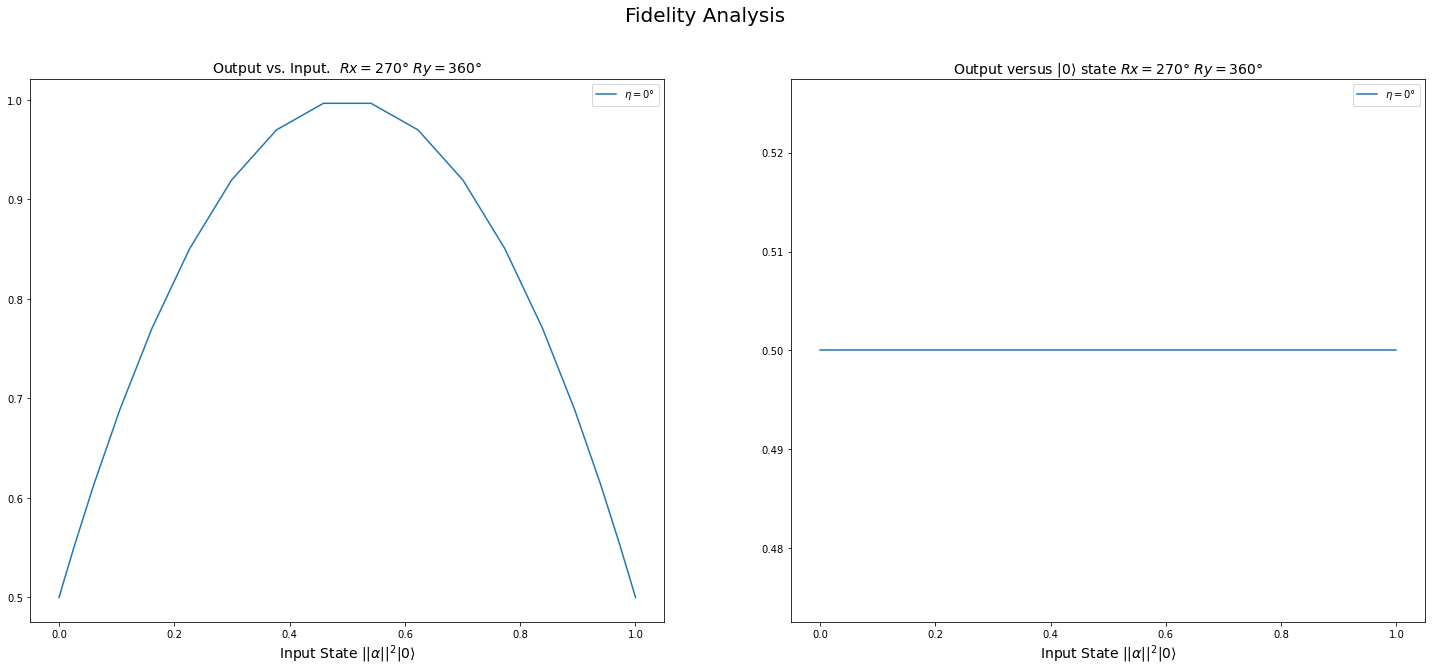

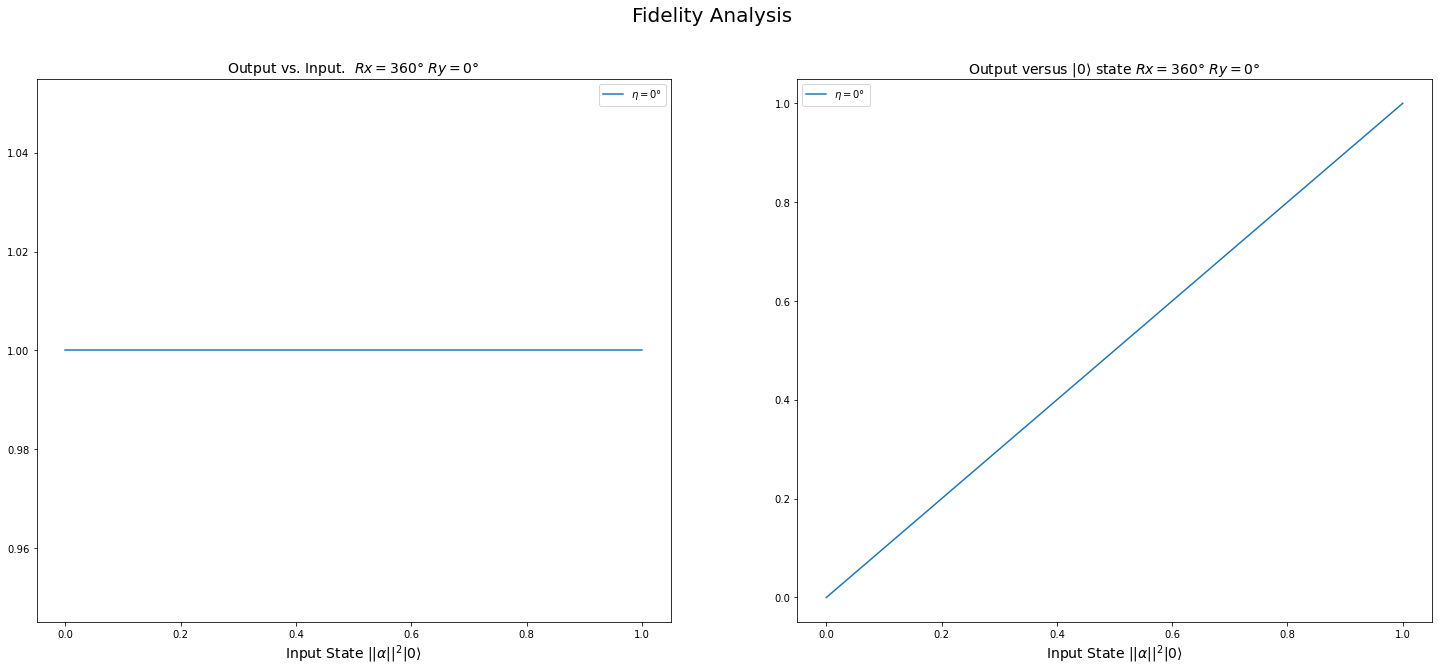

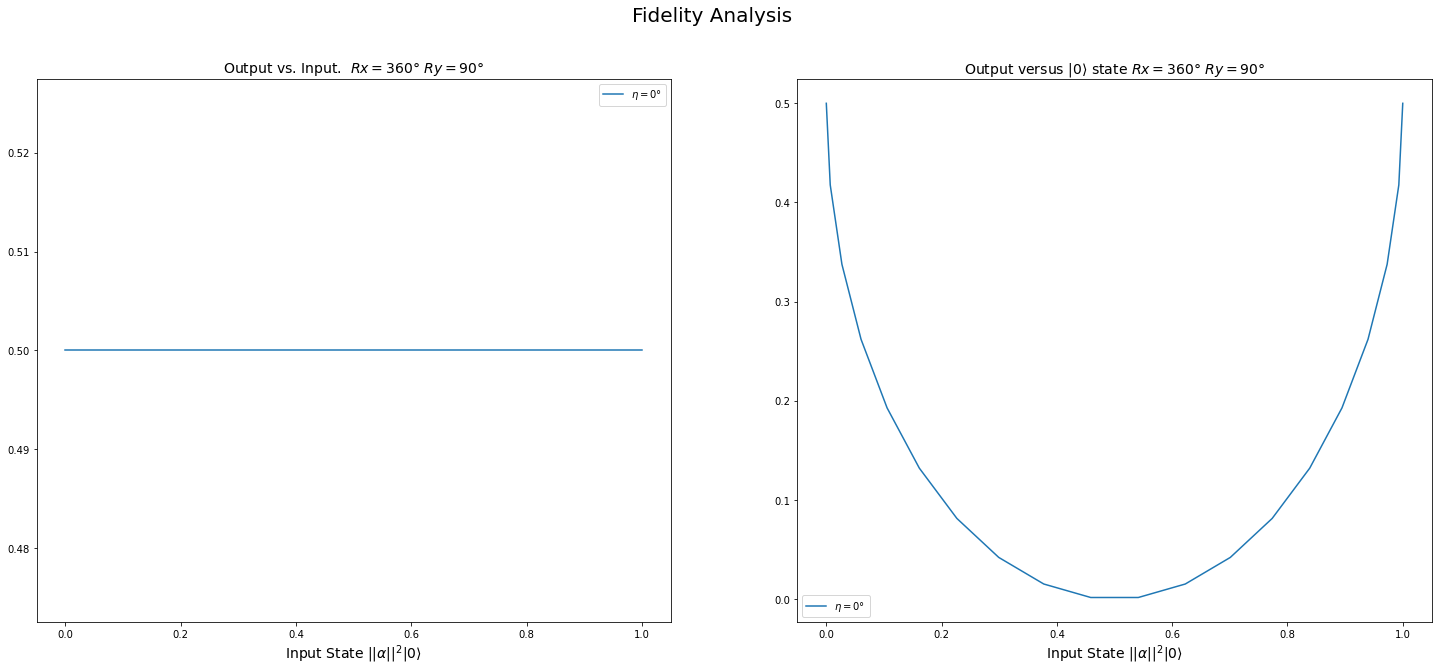

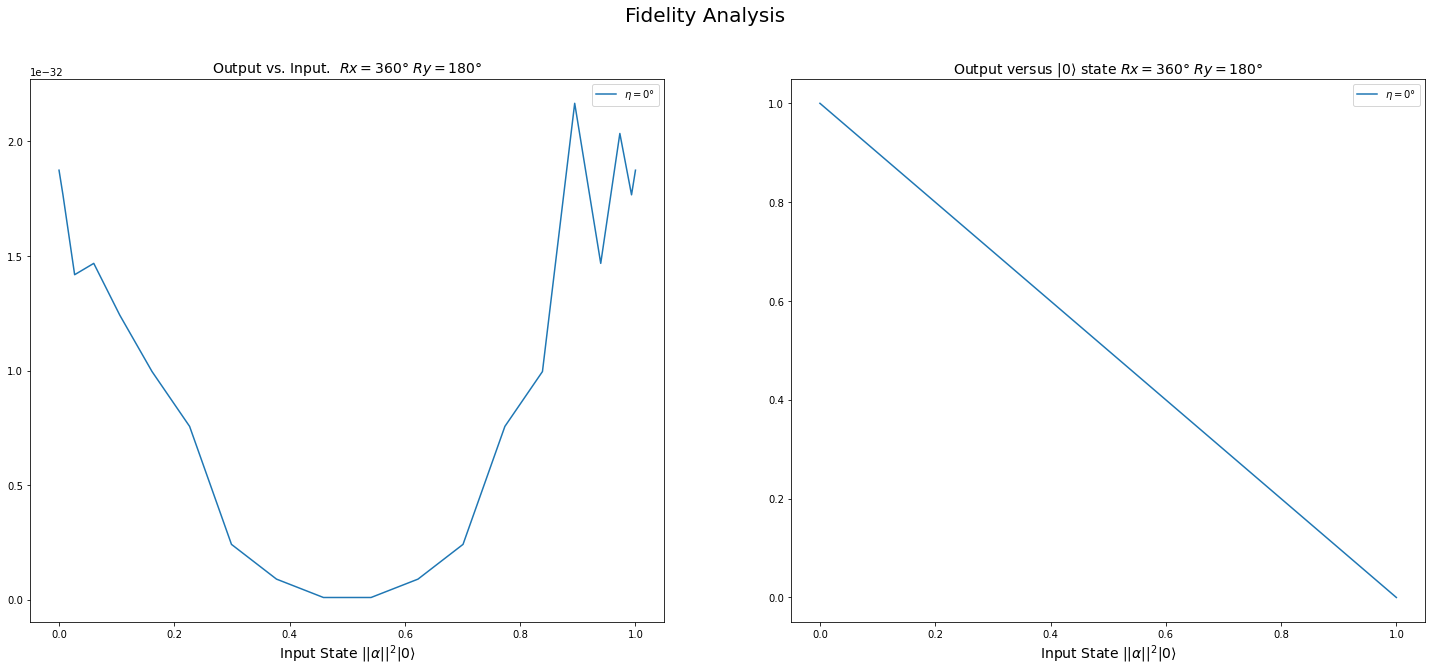

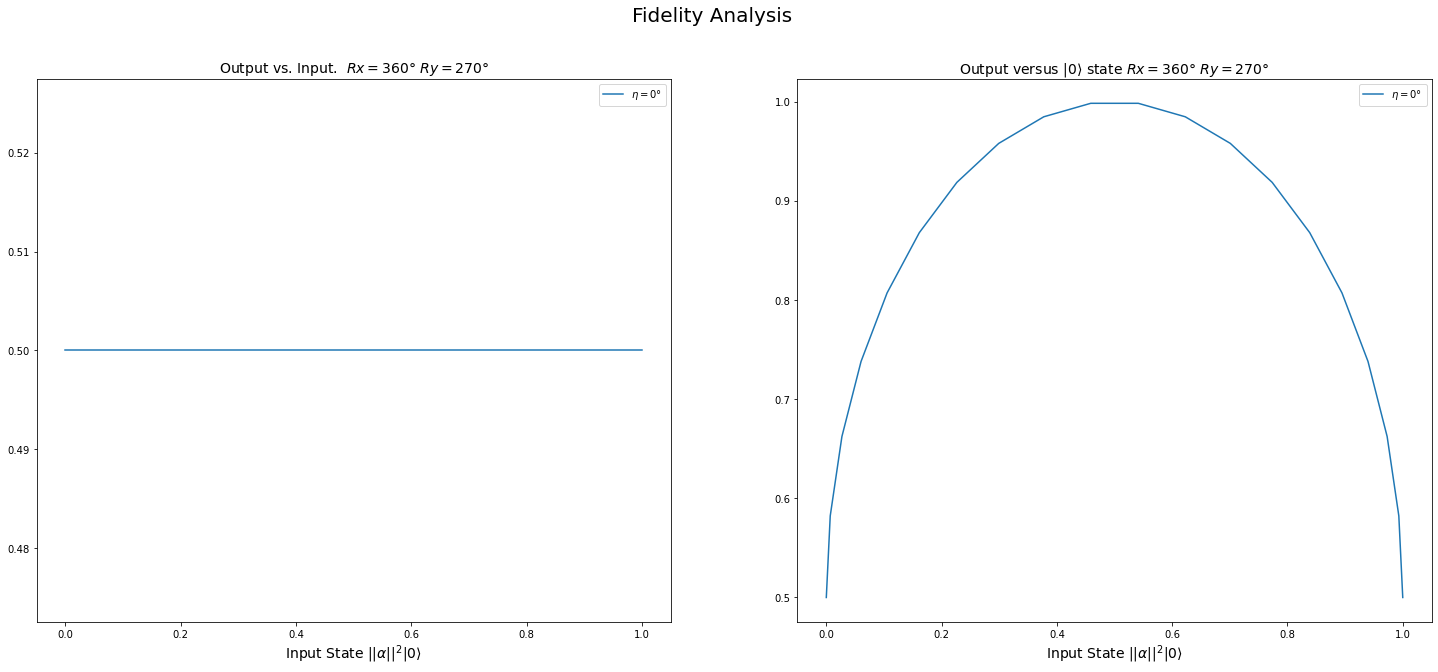

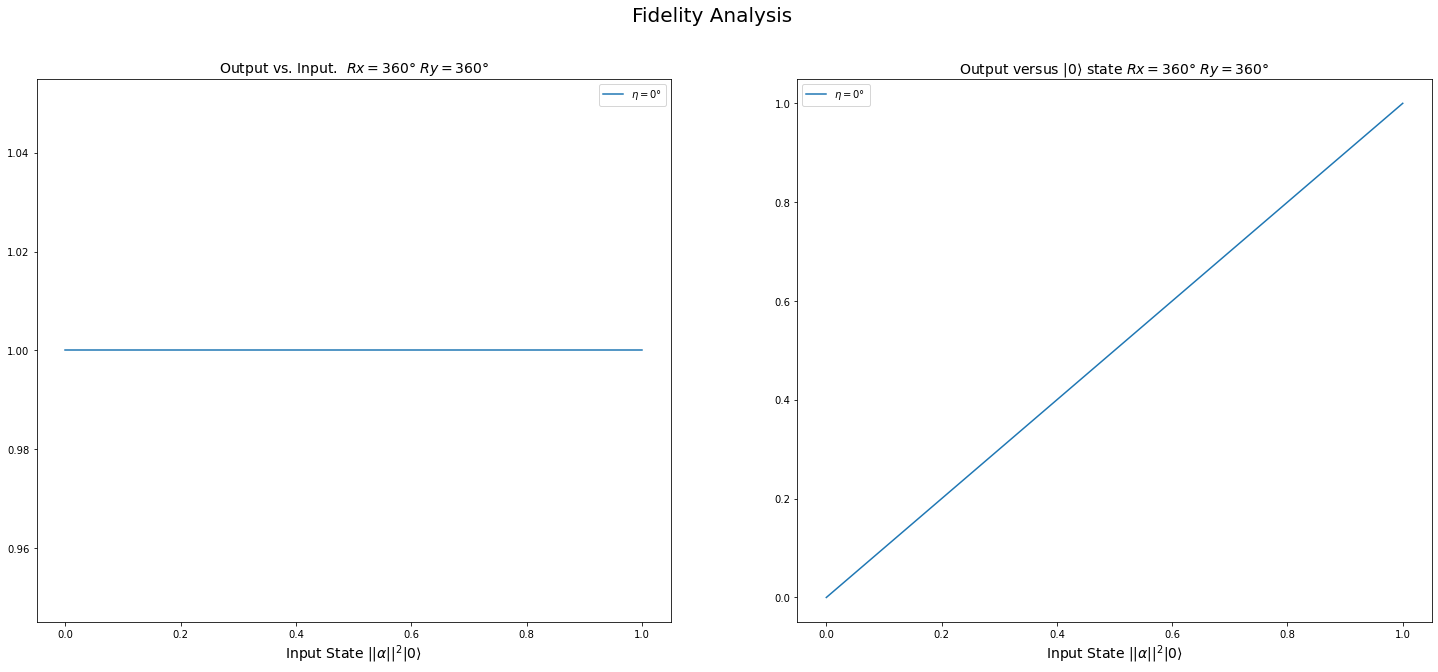

In [26]:
points_theta = 20  # Points of Theta angle (pi) in Bloch sphere - min 2
#angles_eta = np.arange(0, 2*pi, 2*pi/points_theta) 
angles_eta = [0, pi/4, pi/2]
angles = [0, pi/2, pi, 1.5*pi, 2*pi]

for angle_rz in angles:
    for angle_ry in angles:
        plot_fidelity(angles_eta, pointsTheta=points_theta, rx_angle=angle_rz, ry_angle=angle_ry)

## What's next?

Launch a classical and VQA optimization to find the optimal values for the 6 input values (input state, $\eta$ attenuation channel, and output measurement angles) that maximizes the probability of discriminating the amplitude damping channel.

## References

- \[1\] Nielsen & Chuang. Section 8.3.5